In [2]:
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import re
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta

#**Alumni - FFLCH - São Paulo.**<br>

**Relatório:** https://docs.google.com/document/d/1PhQhCOVQ-z62e3YFFxun4v9TRdNvYKmXHcLepbkIdIA/edit?usp=sharing

Atualização: 08/12/2021 <br>

Responsável: Gustavo de Andrade<br>
gustavo@if.usp.br
<br>


#**O primeiro dataframe é do "Acesso à plafatorma - Primeiro Acesso"**

In [3]:
dados = pd.read_csv("Dashboard Alumni USP_Primeiro Acesso_Tabela dinâmica.csv")

In [4]:
dados

,Y,M,D,login_status,genre,Record Count
0,2018,6,13,Complete,Male,53
1,2020,10,12,Complete,Female,6
2,2018,10,10,Complete,Male,16
3,2016,11,1,Incomplete,Male,5
4,2018,6,11,Complete,Female,25
...,...,...,...,...,...,...
3435,2021,12,1,Complete,Male,2
3436,2021,11,2,Incomplete,Male,1
3437,2021,11,23,Complete,Female,1
3438,2021,11,23,Incomplete,Male,1


In [5]:
dados1 = pd.DataFrame()
dados1['anos'] = dados['Y']
dados1['total'] = dados['Record Count']

In [6]:
dados1

,anos,total
0,2018,53
1,2020,6
2,2018,16
3,2016,5
4,2018,25
...,...,...
3435,2021,2
3436,2021,1
3437,2021,1
3438,2021,1


In [7]:
evol = pd.DataFrame()
evol['total'] = dados.groupby(['Y'], as_index = True )['Record Count'].sum()
evol = pd.DataFrame(evol)
evol

,total
Y,
2016,447
2017,2272
2018,2135
2019,1603
2020,2388
2021,2166


In [84]:
evol = pd.DataFrame([[447],[2719],[4854],[6457],[8845],[11011]], columns=['Total'], index=["2016", "2017","2018","2019","2020","2021"])
evol

,Total
2016,447
2017,2719
2018,4854
2019,6457
2020,8845
2021,11011


Text(0.5, 1.0, 'Inscritros no ALUMNI USP - FFLCH - São Paulo')

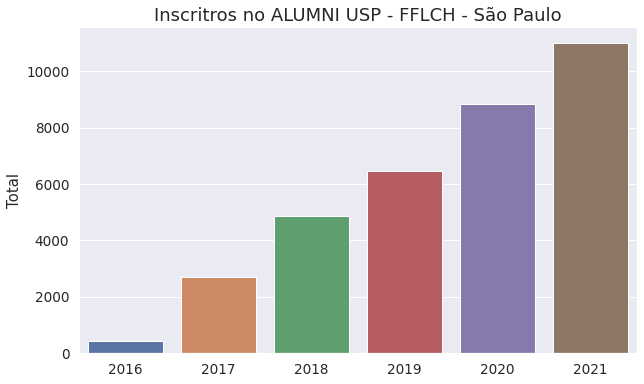

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(data=evol, x=evol.index, y='Total')
plt.title('Inscritros no ALUMNI USP - FFLCH - São Paulo', fontsize=18)

Text(0.5, 1.0, 'Inscritros no ALUMNI USP - FFLCH - São Paulo')

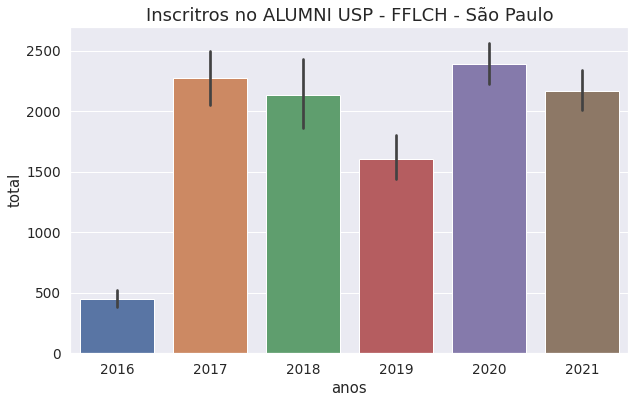

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dados1, x='anos', y='total', estimator=sum)
plt.title('Inscritros no ALUMNI USP - FFLCH - São Paulo', fontsize=18)

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Y             3440 non-null   int64 
 1   M             3440 non-null   int64 
 2   D             3440 non-null   int64 
 3   login_status  3440 non-null   object
 4   genre         3440 non-null   object
 5   Record Count  3440 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 161.4+ KB


In [12]:
n = 0
data_e_hora_em_texto = str(dados['Y'][n]) + '-' + str(dados['M'][n]) +  '-' + str(dados['D'][n])

In [13]:
data_e_hora_em_texto

'2018-6-13'

In [14]:
n = 0    
lista = []
while n < len(dados):
    lista_insert = str(dados['Y'][n]) + '-' + str(dados['M'][n]) +  '-' + str(dados['D'][n])
    lista.insert(n, lista_insert)
    n += 1

In [15]:
dados['data'] = lista

In [16]:
dados['data'] = dados['data'].astype('datetime64[ns]')
dados

,Y,M,D,login_status,genre,Record Count,data
0,2018,6,13,Complete,Male,53,2018-06-13
1,2020,10,12,Complete,Female,6,2020-10-12
2,2018,10,10,Complete,Male,16,2018-10-10
3,2016,11,1,Incomplete,Male,5,2016-11-01
4,2018,6,11,Complete,Female,25,2018-06-11
...,...,...,...,...,...,...,...
3435,2021,12,1,Complete,Male,2,2021-12-01
3436,2021,11,2,Incomplete,Male,1,2021-11-02
3437,2021,11,23,Complete,Female,1,2021-11-23
3438,2021,11,23,Incomplete,Male,1,2021-11-23


In [17]:
data_dados = pd.DataFrame()
data_dados

""


In [18]:
data_dados['total'] = dados.groupby(['data'])['Record Count'].sum()
data_dados

,total
data,
2016-10-02,1
2016-10-04,1
2016-10-05,5
2016-10-06,1
2016-10-07,1
...,...
2021-12-02,6
2021-12-03,6
2021-12-04,2


In [19]:
fig = px.area(dados, facet_col="genre",  x='data', y='Record Count')
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
fig = px.area(dados, x='data', y='Record Count')
fig.show()

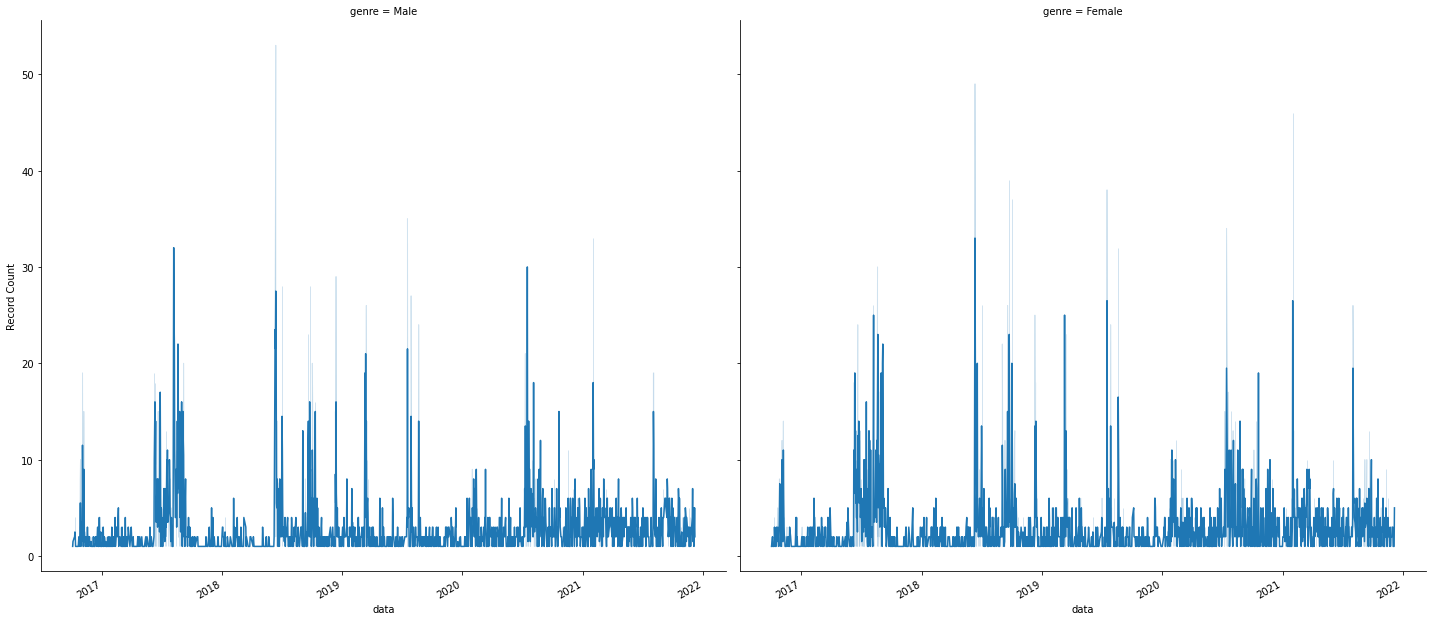

In [21]:
g = sns.relplot(x="data", y="Record Count", kind="line", data=dados, col="genre", height=10)
g.figure.autofmt_xdate()

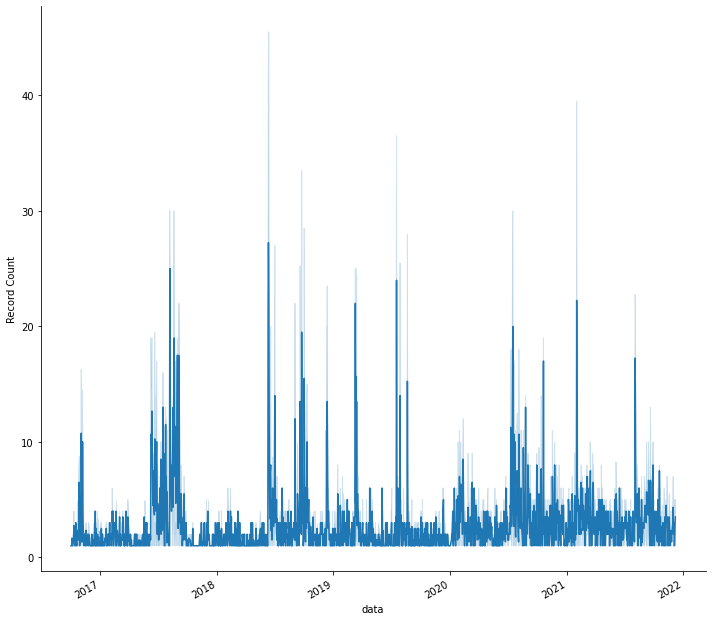

In [22]:
g = sns.relplot(x="data", y="Record Count", kind="line", data=dados, height=10)
g.figure.autofmt_xdate()

In [23]:
dados['mes_ano'] = dados['data'].map(lambda x: 100*x.year + x.month)
dados_mes = dados.groupby(['mes_ano'])['Record Count'].sum().reset_index()

In [24]:
dados

,Y,M,D,login_status,genre,Record Count,data,mes_ano
0,2018,6,13,Complete,Male,53,2018-06-13,201806
1,2020,10,12,Complete,Female,6,2020-10-12,202010
2,2018,10,10,Complete,Male,16,2018-10-10,201810
3,2016,11,1,Incomplete,Male,5,2016-11-01,201611
4,2018,6,11,Complete,Female,25,2018-06-11,201806
...,...,...,...,...,...,...,...,...
3435,2021,12,1,Complete,Male,2,2021-12-01,202112
3436,2021,11,2,Incomplete,Male,1,2021-11-02,202111
3437,2021,11,23,Complete,Female,1,2021-11-23,202111
3438,2021,11,23,Incomplete,Male,1,2021-11-23,202111


In [25]:
dados_mes = dados_mes.append(dados_mes)

In [26]:
dados_mes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 62
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mes_ano       126 non-null    int64
 1   Record Count  126 non-null    int64
dtypes: int64(2)
memory usage: 3.0 KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text major ticklabel objects>)

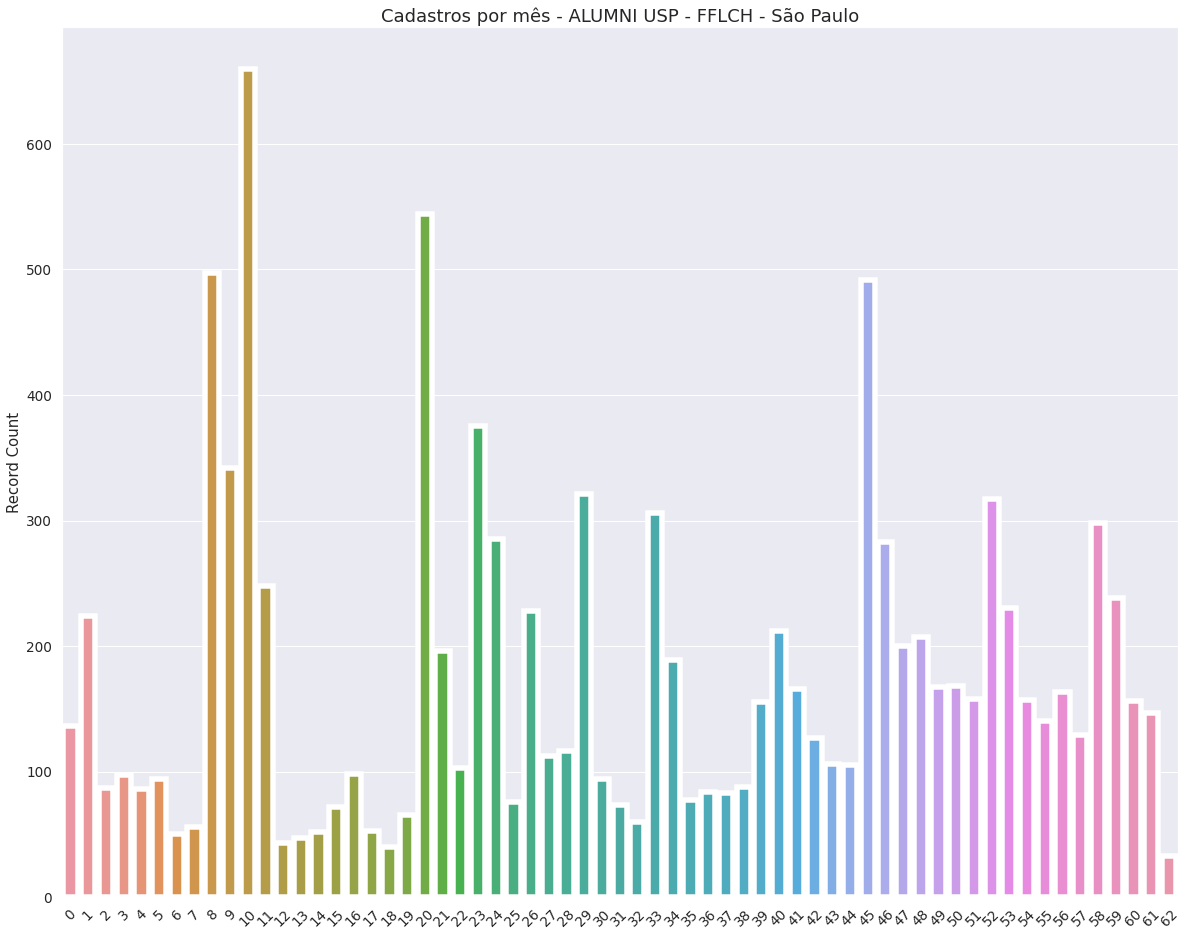

In [88]:
plt.figure(figsize=(20,16))
sns.barplot(data=dados_mes, x=dados_mes.mes_ano.index, y='Record Count',
                 linewidth=5.5)
plt.title('Cadastros por mês - ALUMNI USP - FFLCH - São Paulo', fontsize=18)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text major ticklabel objects>)

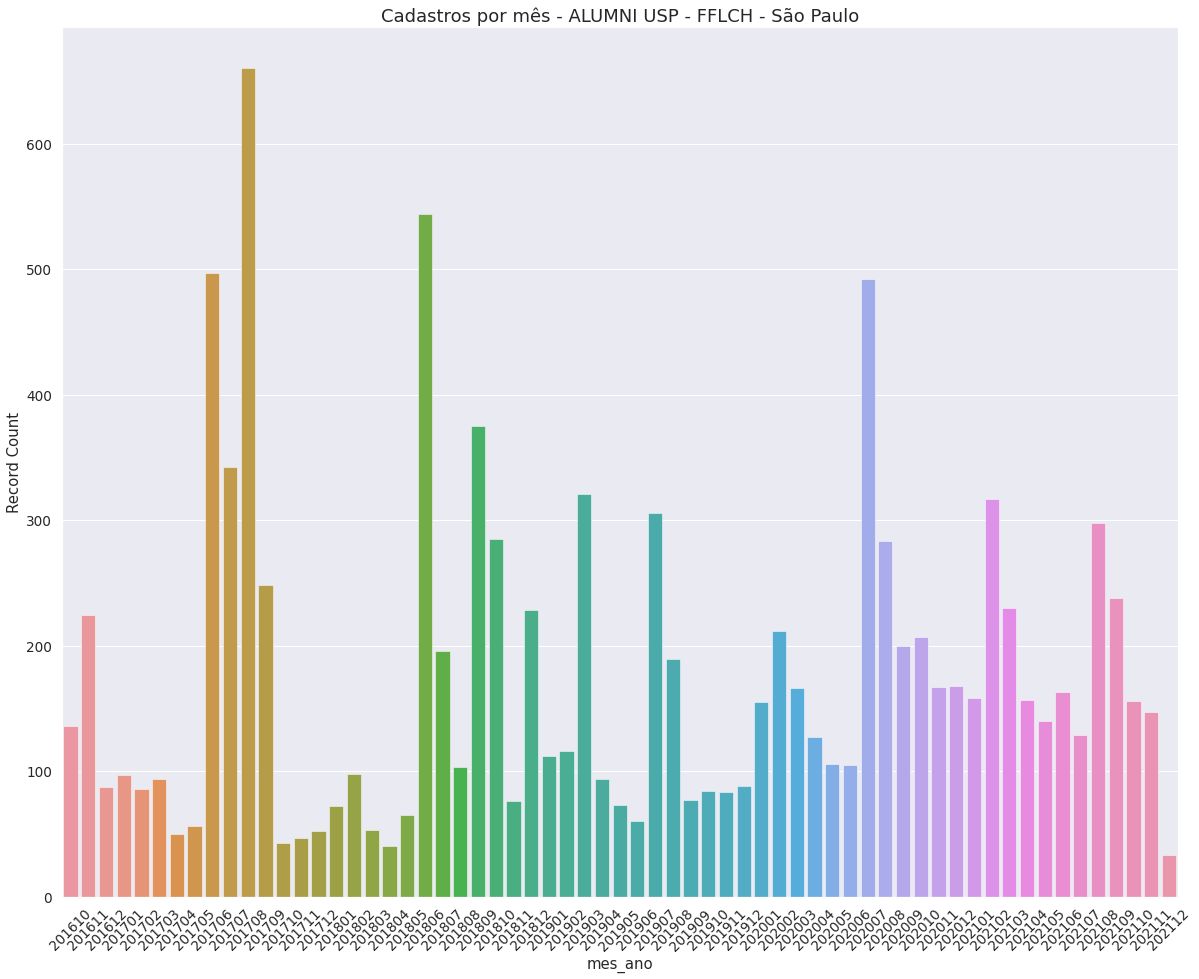

In [89]:
plt.figure(figsize=(20,16))
sns.barplot(data=dados_mes, x=dados_mes.mes_ano, y='Record Count',
                 linewidth=0.5)
plt.title('Cadastros por mês - ALUMNI USP - FFLCH - São Paulo', fontsize=18)
plt.xticks(rotation=45)

In [29]:
login_status_estat = dados.groupby(['login_status'])['Record Count'].sum()
login_status_estat 

login_status
Complete      10162
Incomplete      849
Name: Record Count, dtype: int64

(-1.1076812230353068,
 1.1004829805621608,
 -1.1076757308018867,
 1.1003655228847227)

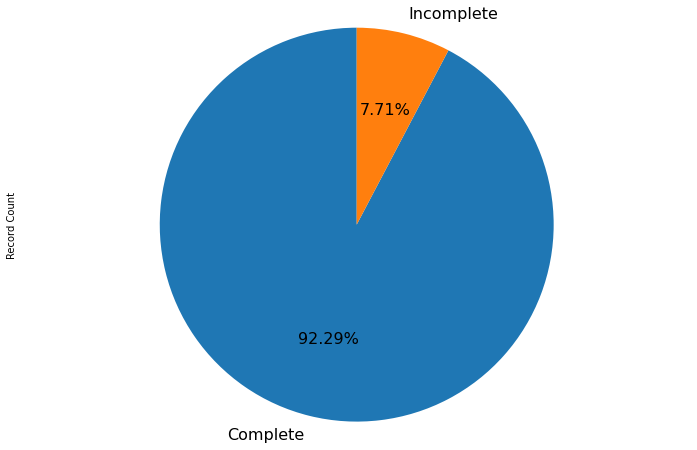

In [30]:
fig = plt.figure(figsize=(12, 8))
login_status_estat.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal') 

In [31]:
group_record_count_y = dados.groupby(['Y'])['Record Count'].sum()

In [32]:
group_record_count_y

Y
2016     447
2017    2272
2018    2135
2019    1603
2020    2388
2021    2166
Name: Record Count, dtype: int64

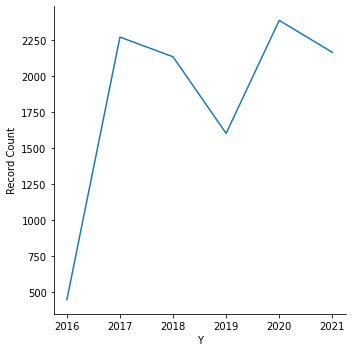

In [33]:
sns.relplot( ci="sd", kind="line", data=group_record_count_y);

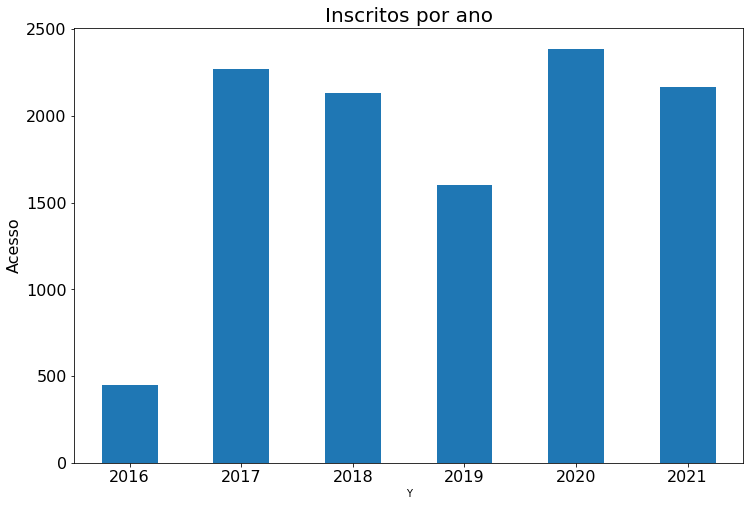

In [34]:
plt.figure(figsize=(12, 8))
group_record_count_y.plot(kind='bar')
plt.title('Inscritos por ano', fontsize=20)
plt.ylabel('Acesso', fontsize=16)
plt.tick_params(labelsize=16)
plt.xticks(rotation=0)
plt.show()

#**O segundo dataframe é do "Acessos à plafatorma - Abrangência"**

In [35]:
dados2 = pd.read_csv("Dashboard Alumni USP_Acesso - Abrangência_Tabela.csv")

In [36]:
dados2

,institution,total_active_inactive,is_inactive,is_active,perc_active,is_complete,perc_complete
0,"Faculdade de Filosofia, Letras e Ciências Humanas",36766,25755,11011,0.299489,10162,0.922895


In [37]:
ranking_inscritos = pd.DataFrame()
ranking_inscritos['unidades'] = dados2['institution']
ranking_inscritos['total'] = dados2['is_active']
ranking_inscritos = ranking_inscritos.sort_values(['total'],ascending=False)
ranking_inscritos

,unidades,total
0,"Faculdade de Filosofia, Letras e Ciências Humanas",11011


In [38]:
inscritos_alumni = ranking_inscritos['total'].sum() 
inscritos_alumni

11011

Total verificado! corresponde perfeito!

Filtrando

In [39]:
ranking_inscritos_abs_top = ranking_inscritos[:10] 
ranking_inscritos_abs_top.to_excel('ranking_inscritos_abs_top.xlsx', sheet_name='Sheet1')
ranking_inscritos_abs_top

,unidades,total
0,"Faculdade de Filosofia, Letras e Ciências Humanas",11011


**Total de formados**

In [40]:
formados_total = pd.DataFrame()
formados_total['unidades'] = dados2['institution']
formados_total['total'] = dados2['total_active_inactive']
formados_total = formados_total.sort_values(['total'],ascending=False)
formados_total

,unidades,total
0,"Faculdade de Filosofia, Letras e Ciências Humanas",36766


In [41]:
formados = formados_total['total'].sum() 
formados

36766

In [42]:
ranking_inscritos_rel = pd.DataFrame()
ranking_inscritos_rel['unidades'] = dados2['institution']
ranking_inscritos_rel['total'] = dados2['perc_active']
ranking_inscritos_rel = ranking_inscritos_rel.sort_values(['total'],ascending=False)
ranking_inscritos_rel

,unidades,total
0,"Faculdade de Filosofia, Letras e Ciências Humanas",0.299489


In [43]:
ranking_inscritos_rel_top = ranking_inscritos_rel[:10] 
ranking_inscritos_rel_top['total'] = ranking_inscritos_rel_top['total']*100
ranking_inscritos_rel_top.to_excel('ranking_inscritos_rel_top.xlsx', sheet_name='Sheet1')
ranking_inscritos_rel_top

,unidades,total
0,"Faculdade de Filosofia, Letras e Ciências Humanas",29.948866


**Perfil completo ou incompleto - Total**

In [44]:
ranking_perfil_completo = pd.DataFrame()
ranking_perfil_completo['unidades'] = dados2['institution']
ranking_perfil_completo['total'] = dados2['is_complete']
ranking_perfil_completo = ranking_perfil_completo.sort_values(['total'],ascending=False)
ranking_perfil_completo

,unidades,total
0,"Faculdade de Filosofia, Letras e Ciências Humanas",10162


**Perfil completo ou incompleto - Relativo**

In [45]:
ranking_perfil_completo_rel = pd.DataFrame()
ranking_perfil_completo_rel['unidades'] = dados2['institution']
ranking_perfil_completo_rel['total'] = dados2['perc_complete']
ranking_perfil_completo_rel = ranking_perfil_completo_rel.sort_values(['total'],ascending=False)
ranking_perfil_completo_rel

,unidades,total
0,"Faculdade de Filosofia, Letras e Ciências Humanas",0.922895


#**O Terceiro DataFrame é:"Acessos à plafatorma - Demográfico"**<br>
Essa parte no dashboard divide em duas tabelas, no qual podemos exportar dois csv, logo, são dois arquivos.

In [46]:
dados3_1 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Tabela.csv")
dados3_2 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Tabela dinâmica.csv")
dados3_3 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Gráfico de pizza.csv")

In [47]:
dados3_1

,periodstartyear,total_active_inactive,is_inactive,is_active,perc_active,is_complete,perc_complete
0,2020,2,0,2,1.000000,2,1.000000
1,2019,34,19,15,0.441176,15,1.000000
2,2018,86,29,57,0.662791,52,0.912281
3,2017,274,90,184,0.671533,177,0.961957
4,2016,596,221,375,0.629195,364,0.970667
5,2015,875,335,540,0.617143,521,0.964815
6,2014,1000,436,564,0.564000,535,0.948582
7,2013,1048,519,529,0.504771,504,0.952741
8,2012,1112,575,537,0.482914,508,0.945996
9,2011,1160,651,509,0.438793,470,0.923379


In [48]:
dados3_2

,age,Record Count,Record Count.1
0,Entre 51 e 60,1512,0.137317
1,Entre 41 e 50,2438,0.221415
2,Entre 31 e 40,4292,0.389792
3,Entre 61 e 70,522,0.047407
4,Entre 71 e 80,99,0.008991
5,Entre 81 e 90,4,0.000363
6,Entre 26 e 30,1577,0.143220
7,Entre 91 ou mais,1,0.000091
8,Entre 0 e 20,1,0.000091
9,Entre 21 e 25,565,0.051312


In [49]:
dados3_3

,genre,Record Count
0,Female,21624
1,Male,15142


#**O quinto DataFrame é: "Status Profissional"**<br>
Essa parte no dashboard divide em duas tabelas, no qual podemos exportar dois csv, logo, são dois arquivos.

In [50]:
dados5 = pd.read_csv("Dashboard Alumni USP_Status Profissional_Tabela dinâmica.csv")

In [51]:
dados5

,prof_status,Y,Record Count
0,Sou Empregado ou Servidor Público,2018,1461
1,Sou Profissional Liberal,2020,222
2,Sou Empreendedor,2018,66
3,Estou Aposentado,2018,41
4,Estou Procurando Emprego,2018,122
...,...,...,...
82,Nenhuma das anteriores,2019,4
83,Procuro meu Primeiro Emprego,2020,26
84,Estou Aposentado,2016,1
85,Sou Pós-doutorando,2018,1


In [52]:
prof_status_total = dados5.groupby(by="prof_status")['Record Count'].sum().sort_values(ascending=False)
prof_status_total

prof_status
Sou Empregado ou Servidor Público    3424
-                                    1730
Sou Empregado                        1212
Estou Procurando Emprego              665
Sou Profissional Liberal              593
Sou Estudante                         513
Sou Servidor Público Estadual         401
Sou Empreendedor                      324
Sou Servidor Público Federal          313
Sou Servidor Público Municipal        262
Sou Estudante com Bolsa               246
Nenhuma das anteriores                158
Estou Aposentado                      126
Procuro meu Primeiro Emprego          117
Sou Pós-doutorando                     78
Name: Record Count, dtype: int64

In [53]:
dados5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prof_status   87 non-null     object
 1   Y             87 non-null     int64 
 2   Record Count  87 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.2+ KB


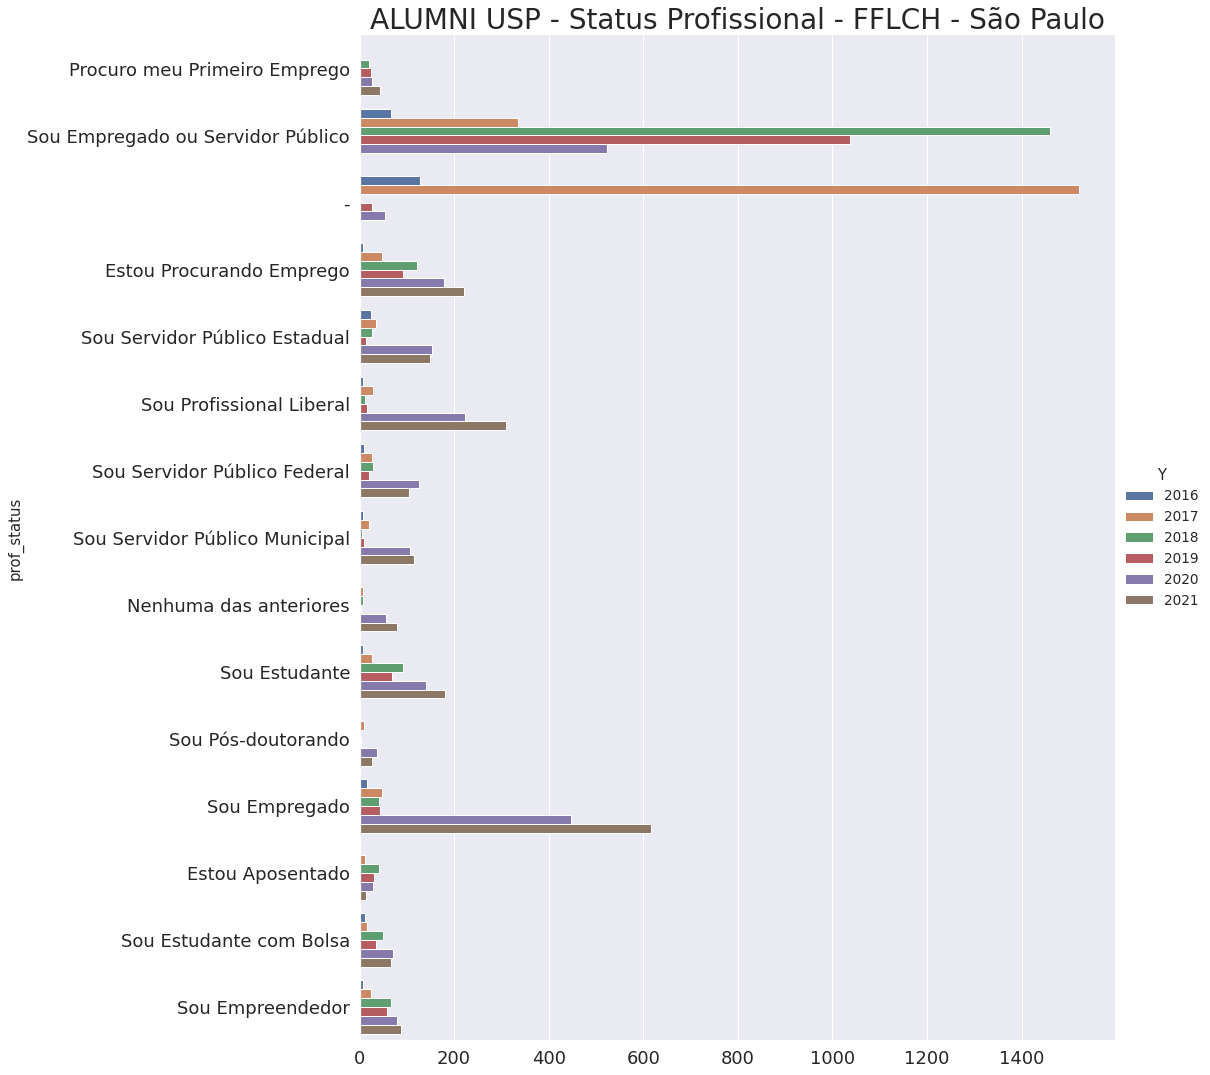

In [90]:
sns.catplot( y="prof_status", x="Record Count", hue="Y", estimator=np.sum, order = dados5['prof_status'].value_counts().sort_values(ascending=True).index,
            kind="bar", 
            data=dados5, height=15)
plt.title('ALUMNI USP - Status Profissional - FFLCH - São Paulo', fontsize=28)
plt.xlabel('', fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

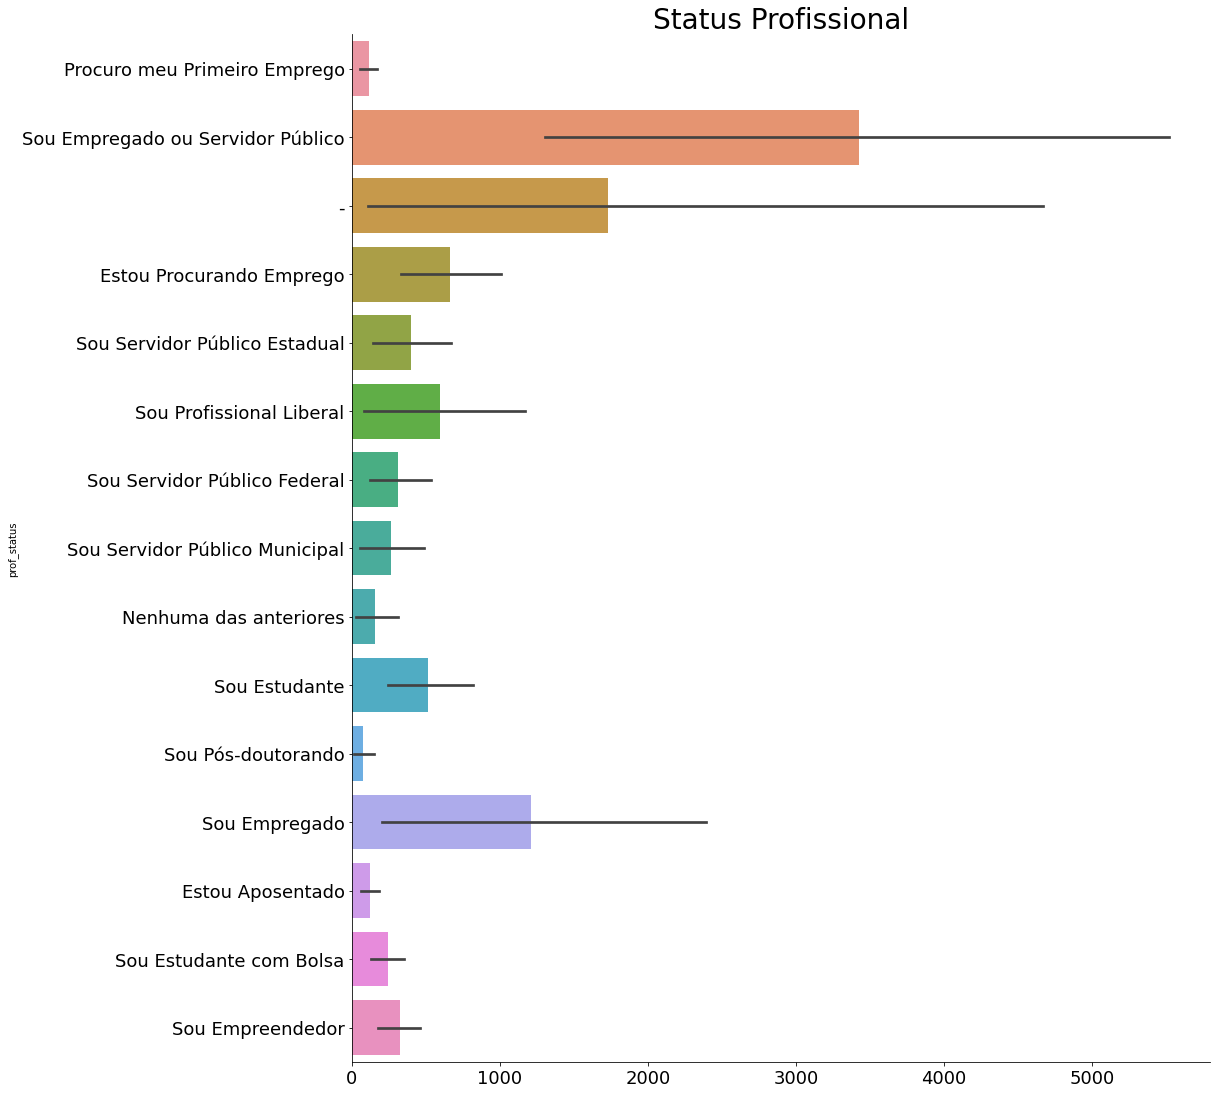

In [55]:
sns.catplot( y="prof_status", x="Record Count", estimator=np.sum, order = dados5['prof_status'].value_counts().sort_values(ascending=True).index,
            kind="bar", 
            data=dados5, height=15)
plt.title('Status Profissional', fontsize=28)
plt.xlabel('', fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

#**O sexto DataFrame é: "Área de Atuação"**


In [56]:
dados6 = pd.read_csv("Dashboard Alumni USP_Área de Atuação_Tabela dinâmica.csv")

In [57]:
dados6

,prof_field,Y,Record Count
0,na mesma área de todas minhas formações na USP,2018,1226
1,na mesma área da minha Pós-Graduação na USP,2020,317
2,em outra área,2018,396
3,não atuo profissionalmente,2018,293
4,-,2017,1522
5,na mesma área de todas minhas formações na USP,2020,689
6,na mesma área da minha Graduação na USP,2020,500
7,-,2020,53
8,na mesma área de todas minhas formações na USP,2016,87
9,em outra área,2020,487


Total de respostas:

In [58]:
dados6['Record Count'].sum()


10162

In [59]:
area_atuacao = pd.DataFrame()
area_atuacao['unidades'] = dados6['prof_field']
area_atuacao['total'] = dados6['Record Count']
area_atuacao = area_atuacao.sort_values(['total'],ascending=False)
area_atuacao

,unidades,total
4,-,1522
0,na mesma área de todas minhas formações na USP,1226
11,na mesma área de todas minhas formações na USP,902
18,na mesma área da minha Graduação na USP,898
5,na mesma área de todas minhas formações na USP,689
17,em outra área,517
6,na mesma área da minha Graduação na USP,500
9,em outra área,487
2,em outra área,396
10,na mesma área de todas minhas formações na USP,346


In [60]:
area_atuacao = area_atuacao.groupby(['unidades'])['total'].sum().sort_values(ascending=False)
area_atuacao 

unidades
na mesma área de todas minhas formações na USP    3445
em outra área                                     1833
-                                                 1732
na mesma área da minha Graduação na USP           1521
não atuo profissionalmente                         956
na mesma área da minha Pós-Graduação na USP        675
Name: total, dtype: int64

In [61]:
area_atuacao = pd.DataFrame(area_atuacao)

In [62]:
area_atu = pd.DataFrame() 
area_atu = area_atu.append(area_atuacao.loc[:])

In [63]:
area_atu.to_excel('area_atuacao.xlsx', sheet_name='Sheet1')

In [64]:
area_atu = pd.read_excel('area_atuacao.xlsx')  

In [65]:
area_atu

,unidades,total
0,na mesma área de todas minhas formações na USP,3445
1,em outra área,1833
2,-,1732
3,na mesma área da minha Graduação na USP,1521
4,não atuo profissionalmente,956
5,na mesma área da minha Pós-Graduação na USP,675


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



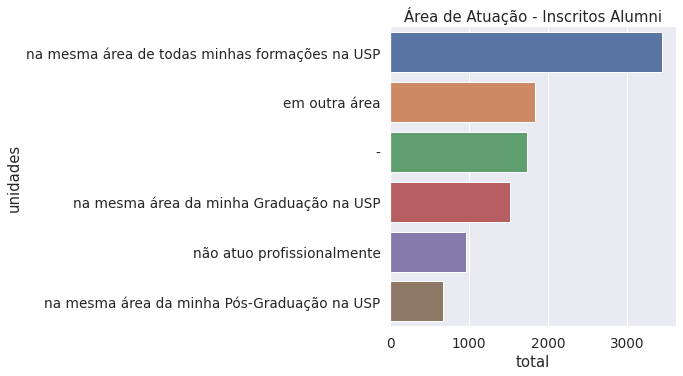

In [66]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= area_atu, y='unidades',x='total', kind="bar")
g.set(title = "Área de Atuação - Inscritos Alumni")

#**O sétimo DataFrame é: " Área de Atuação - por Instituição"**

Dashboard Alumni USP_Área de Atuação - Instituição_Tabela dinâmica

In [67]:
dados7 = pd.read_csv("Dashboard Alumni USP_Área de Atuação - Instituição_Tabela dinâmica.csv")

In [68]:
dados7

,institution,prof_field,Record Count
0,"Faculdade de Filosofia, Letras e Ciências Humanas",na mesma área de todas minhas formações na USP,3445
1,"Faculdade de Filosofia, Letras e Ciências Humanas",na mesma área da minha Pós-Graduação na USP,675
2,"Faculdade de Filosofia, Letras e Ciências Humanas",em outra área,1833
3,"Faculdade de Filosofia, Letras e Ciências Humanas",não atuo profissionalmente,956
4,"Faculdade de Filosofia, Letras e Ciências Humanas",-,1732
5,"Faculdade de Filosofia, Letras e Ciências Humanas",na mesma área da minha Graduação na USP,1521


In [69]:
dados7['prof_field'].unique()

array(['na mesma área de todas minhas formações na USP',
       'na mesma área da minha Pós-Graduação na USP', 'em outra área',
       'não atuo profissionalmente', '-',
       'na mesma área da minha Graduação na USP'], dtype=object)

In [70]:
mask = dados7['institution'].value_counts().head().index

In [71]:
area_atuacao_intuicao = dados7.groupby(['institution'])['Record Count'].sum().sort_values(ascending=False)
area_atuacao_intuicao 

institution
Faculdade de Filosofia, Letras e Ciências Humanas    10162
Name: Record Count, dtype: int64

In [72]:
area_atuacao_intuicao_field = pd.DataFrame()
area_atuacao_intuicao_field['total'] = dados7.groupby(['institution','prof_field'])['Record Count'].sum()
area_atuacao_intuicao_field

total
institution                                       prof_field                                           
Faculdade de Filosofia, Letras e Ciências Humanas -                                                1732
                                                  em outra área                                    1833
                                                  na mesma área da minha Graduação na USP          1521
                                                  na mesma área da minha Pós-Graduação na USP       675
                                                  na mesma área de todas minhas formações na USP   3445
                                                  não atuo profissionalmente                        956

Confere!

In [73]:
area_atuacao_2 = dados7.groupby(['prof_field'])['Record Count'].sum().sort_values(ascending=False)
area_atuacao_2

prof_field
na mesma área de todas minhas formações na USP    3445
em outra área                                     1833
-                                                 1732
na mesma área da minha Graduação na USP           1521
não atuo profissionalmente                         956
na mesma área da minha Pós-Graduação na USP        675
Name: Record Count, dtype: int64

(-1.1164791656571782,
 1.1007847221741514,
 -1.1109779996987692,
 1.1051495653792327)

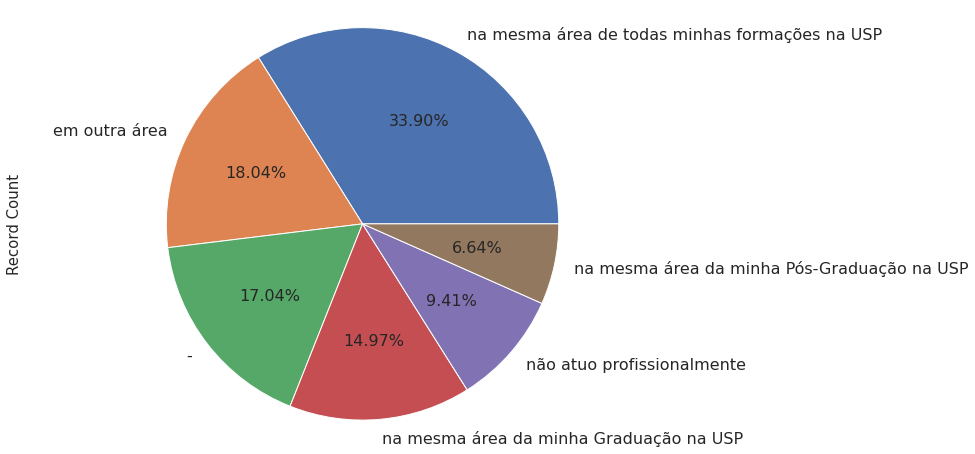

In [74]:
fig = plt.figure(figsize=(12, 8))
area_atuacao_2.plot(kind='pie', autopct='%.2f%%', startangle=0,textprops={'fontsize': 16})
plt.axis('equal') 

#**O oitavo DataFrame é: " Área de Atuação - Empreendedores"**

In [75]:
dados8 = pd.read_csv("Dashboard Alumni USP_Empreendedores_Tabela dinâmica.csv")
dados8

,institution,genre,Record Count
0,"Faculdade de Filosofia, Letras e Ciências Humanas",Male,147
1,"Faculdade de Filosofia, Letras e Ciências Humanas",Female,177


In [76]:
empreenda_genre = dados8.groupby(by="genre")['Record Count'].sum().sort_values(ascending=False)

In [77]:
empreenda_genre

genre
Female    177
Male      147
Name: Record Count, dtype: int64

(-1.1119729904045057,
 1.1259554888747092,
 -1.1107553695329275,
 1.100512160453949)

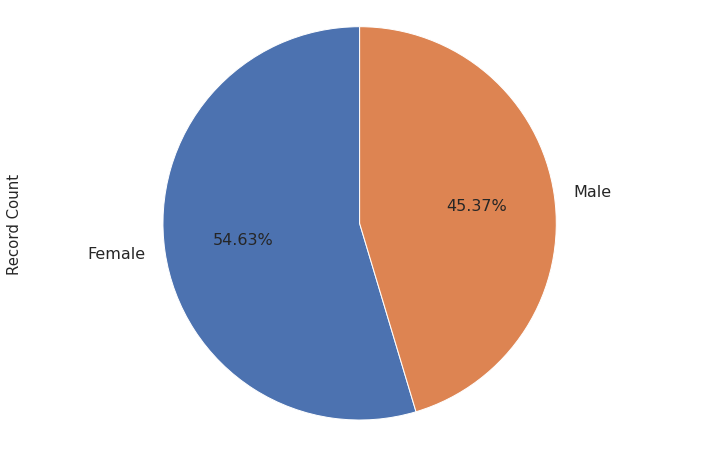

In [78]:
fig = plt.figure(figsize=(12, 8))
empreenda_genre.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal') 

In [79]:
empreenda = dados8.groupby(by="institution")['Record Count'].sum().sort_values(ascending=False)

In [80]:
empreenda

institution
Faculdade de Filosofia, Letras e Ciências Humanas    324
Name: Record Count, dtype: int64

In [81]:
empreenda_ranking = pd.DataFrame()
empreenda_ranking['unidades'] = dados8['institution']
empreenda_ranking['genero'] = dados8['genre']
empreenda_ranking['total'] = dados8['Record Count']
empreenda_ranking = empreenda_ranking.sort_values(['total'],ascending=False)
empreenda_ranking

,unidades,genero,total
1,"Faculdade de Filosofia, Letras e Ciências Humanas",Female,177
0,"Faculdade de Filosofia, Letras e Ciências Humanas",Male,147


In [82]:
empreenda_ranking_filtro = pd.DataFrame()
empreenda_ranking_filtro['total'] = empreenda_ranking.groupby(by="unidades", as_index=True)['total'].sum().sort_values(ascending=False)
empreenda_ranking_filtro = empreenda_ranking_filtro[:10]
empreenda_ranking_filtro.reset_index(inplace=True)

In [83]:
empreenda_ranking_filtro

,unidades,total
0,"Faculdade de Filosofia, Letras e Ciências Humanas",324
